In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:

def gradient(f, x, h=1e-6):
    '''
    Calculate the gradient of f at x by using forward difference
    Args:
        f: function that want to find the gradient
        x: the position where want to find the gradient
    Returns:
        grad: an array of gradients for each dimension
    '''
    temp = []
    N = len(x)

    for i in range(N):
        xx = np.copy(x)
        xx[i] += h
        temp.append((f(xx) - f(x)) / h)

    return np.array(temp)

In [0]:
class AdamOpt():

    def __init__(self, n, alpha=0.001, gamma_v=0.9, gamma_s=0.999, eps=1e-8):
        self._alpha = alpha
        self._gamma_v = gamma_v
        self._gamma_s = gamma_s
        self._eps = eps
        self._n = n
        self._k = 0
        self._s = np.zeros(self._n)
        self._v = np.zeros(self._n)

    def init(self):
        self._k = 0
        self._s = np.zeros(self._n)
        self._v = np.zeros(self._n)

    def step(self, f, x):
        g = gradient(f, x)
        self._v = self._gamma_v * self._v + (1 - self._gamma_v) * g
        self._s = self._gamma_s * self._s + (1 - self._gamma_s) * (g ** 2)
        self._k += 1
        v_hat = self._v / (1 - self._gamma_v ** self._k)
        s_hat = self._s / (1 - self._gamma_s ** self._k)
        return x - self._alpha * v_hat / (np.sqrt(s_hat) + self._eps)

    def optimize(self, f, x, tol=1e-10):
        diff = np.Inf

        while diff > tol:
            nx = self.step(f, x)
            diff = np.abs(f(nx) - f(x))
            x = nx

        return x


class MomemtunOpt():

    def __init__(self, n, alpha=1e-4, beta=1e-4):
        self._alpha = alpha
        self._beta = beta
        self._n = n
        self._test = 0
        self._v = np.zeros(n)

    def init(self):
        self._v = np.zeros(self._n)

    def step(self, f, x):
        g = gradient(f, x)
        self._v = self._beta * self._v - self._alpha * g
        return x + self._v

    def optimize(self, f, x, tol=1e-10):
        diff = np.Inf

        while diff > tol:
            nx = self.step(f, x)
            diff = np.abs(f(nx) - f(x))
            x = nx

        return x

In [0]:
class LookAheadOpt():

    def __init__(self, opt, k=5, alpha=0.5):
        self._opt = opt
        self._k = k
        self._alpha = alpha

    def step(self, f, x):
        nx = np.copy(x)

        for _ in range(self._k):
            nx = self._opt.step(f, nx)

        return x + self._alpha * (nx - x)

    def optimize(self, f, x, tol=1e-10):
        diff = np.Inf

        while diff > tol:
            nx = self.step(f, x)
            diff = np.abs(f(nx) - f(x))
            x = nx

        return x

In [0]:
def rosen(x, a=1, b=5):
    n = len(x)
    return sum((a - x[i])**2 + b*(x[i+1]- x[i]**2)**2 for i in range(n-1))

In [0]:
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)
P = np.stack([X,Y])
Z = rosen(P)

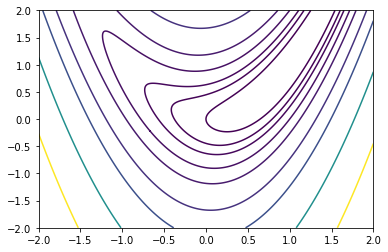

In [6]:
plt.contour(X, Y, Z, [1, 2, 3, 5, 8, 15, 25, 50, 100])

In [0]:
adam = AdamOpt(2)
momentum = MomemtunOpt(2)

In [0]:
lookahead_adam = LookAheadOpt(adam)
lookahead_mom = LookAheadOpt(momentum)

In [0]:
def generate_random(low, high):
    return np.random.random() * (high - low) + low

In [0]:
init_x = np.array([generate_random(-2, 2), generate_random(-2, 2)])

In [0]:
def process(opt, func, x, k=2000):
    p = np.zeros((k+1,2))
    p[0] = x
    
    for i in range(k):
        x = opt.step(func, x)
        p[i+1] = x
    
    return p

In [0]:
x_adam = process(adam, rosen, init_x)
x_mom = process(momentum, rosen, init_x)

In [0]:
x_la_adam = process(lookahead_adam, rosen, init_x)
x_la_mom = process(lookahead_mom, rosen, init_x)

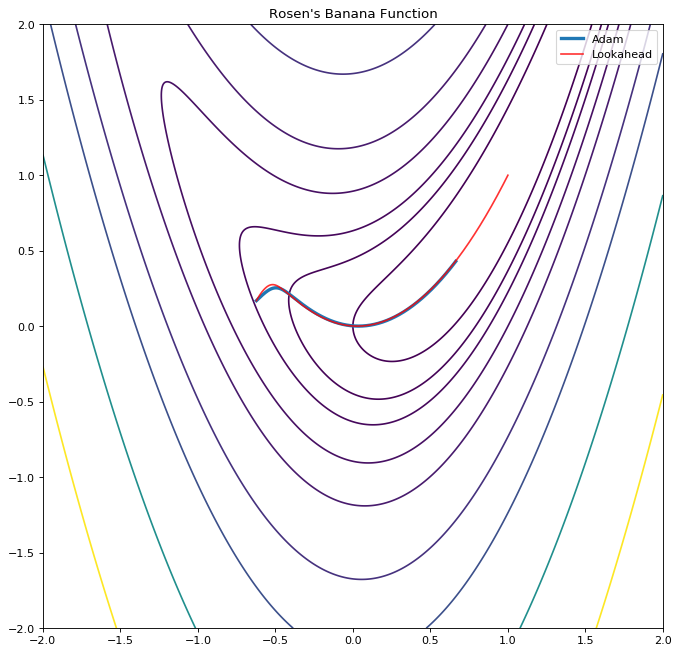

In [21]:
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.contour(X, Y, Z, [1, 2, 3, 5, 8, 15, 25, 50, 100])
plt.plot(x_adam[:,0], x_adam[:,1], linewidth=3, label='Adam')
plt.plot(x_la_adam[:,0], x_la_adam[:,1], color='r', alpha=0.8, label='Lookahead')
plt.title("Rosen's Banana Function")
plt.legend()
plt.savefig('Rosen.jpg')

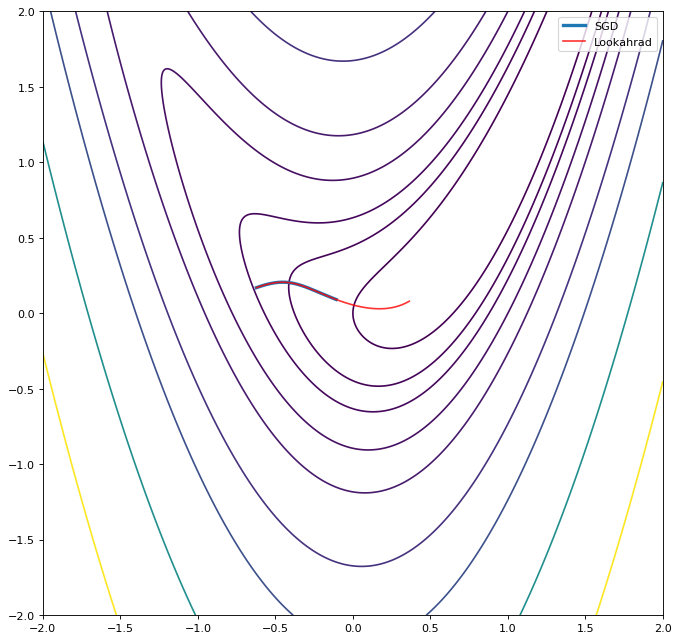

In [23]:
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.contour(X, Y, Z, [1, 2, 3, 5, 8, 15, 25, 50, 100])
plt.plot(x_mom[:,0], x_mom[:,1], linewidth=3, label='SGD')
plt.plot(x_la_mom[:,0], x_la_mom[:,1], color='r', alpha=0.8, label='Lookahrad')
plt.legend()
plt.savefig('Rosen_SGD.jpg')

In [0]:
def flower(x, a=1, b=1, c=4):
    n = len(x)
    return sum(a * np.linalg.norm(x[i:i+2], axis=0) + b * np.sin(c * np.arctan2(x[i+1], x[i])) for i in range(n-1))

In [0]:
Z_flower = flower(P)

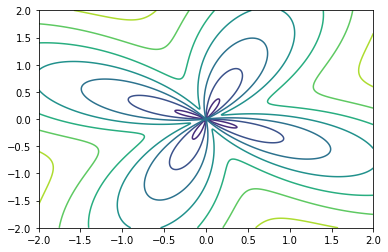

In [26]:
plt.contour(X, Y, Z_flower)

In [0]:
init_x = np.array([generate_random(-2, 2), generate_random(-2, 2)])

In [0]:
x_adam = process(adam, flower, init_x)
x_mom = process(momentum, flower, init_x)

In [0]:
x_la_adam = process(lookahead_adam, flower, init_x)
x_la_mom = process(lookahead_mom, flower, init_x)

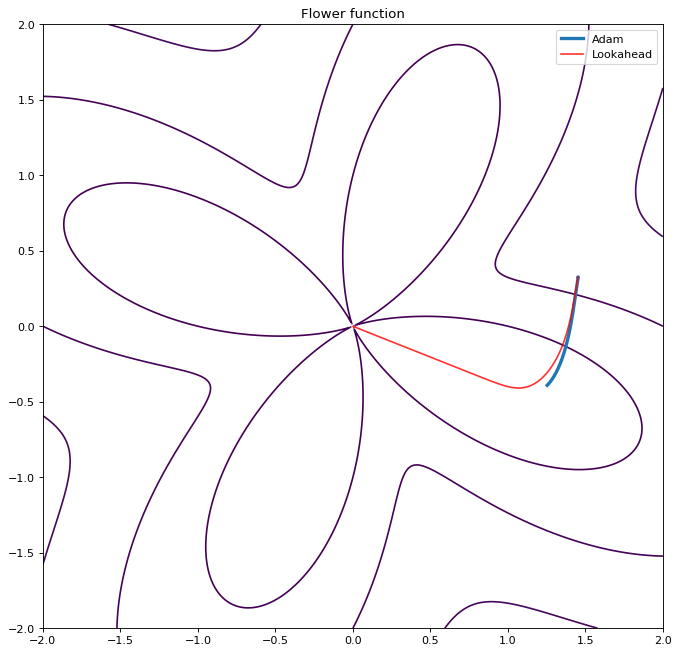

In [35]:
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.contour(X, Y, Z_flower, [1, 2, 3, 5, 8, 15, 25, 50, 100])
plt.plot(x_adam[:,0], x_adam[:,1], linewidth=3, label='Adam')
plt.plot(x_la_adam[:,0], x_la_adam[:,1], color='r', alpha=0.8, label='Lookahead')
plt.title('Flower function')
plt.legend()
plt.savefig('Flower_Adam.jpg')

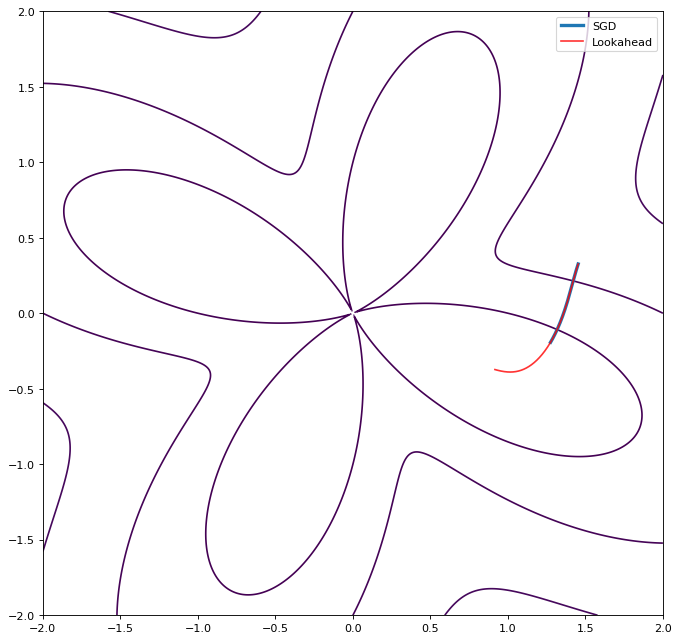

In [37]:
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.contour(X, Y, Z_flower, [1, 2, 3, 5, 8, 15, 25, 50, 100])
plt.plot(x_mom[:,0], x_mom[:,1], linewidth=3, label='SGD')
plt.plot(x_la_mom[:,0], x_la_mom[:,1], color='r', alpha=0.8, label='Lookahead')
plt.legend()
plt.savefig('Flower_SGD.jpg')